In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, glob, os
import scipy.stats as st
COMBINATION2_RESULTS_CSV = os.path.join(
    "results", 
    "200-nodes-50-endpoints-20-subnets-3-layers-250000-time.csv"
)

COMBINATION3_RESULTS_CSV = os.path.join(
    "results",
    "3-combination-200-nodes-50-endpoints-20-subnets-3-layers-250000-time.csv"
)

In [2]:
def turn_json_results_to_csv(json_folder, output_csv):
    result_filenames = glob.glob(os.path.join(json_folder, "*.json"))
    
    results = []
    
    for filename in result_filenames:
        with open(filename, "r") as f:
            json_result = json.load(f)
        
        if json_result.get("Simulation Type", "None") == "None":
            json_result["Simulation Type"] = "NoMTD"
        results.append(json_result)
    
    df = pd.DataFrame(results)
    df.to_csv(output_csv, index=False)

In [3]:
# Disabled since not needed now
# Was used just to combine all of the JSON documents to CSV
# turn_json_results_to_csv(
#     os.path.join("results", "3-combination-results", "200-nodes-50-endpoints-20-subnets-3-layers-250000-time"), 
#     COMBINATION3_RESULTS_CSV
# )

In [4]:
combination2_results = pd.read_csv(COMBINATION2_RESULTS_CSV)

In [5]:
combination2_results.head()

,Total Initial Vulnerabilities,Initial Vulns Per OS,Average Initial RoA Per OS,OS Types In Initial Network,Initial Hosts Without Vulnerabilities,Host Compromises,Vuln Compromises,Reuse Password Compromises,Password Spray Compromises,User Account Leaks,Vulnerabilities Exploited,MTD Statistics,Total MTD Events,Total MTD Blocking Hacker Events,Complete Time,Simulation Type
0,649,"{'freebsd': {'12': 36, '10': 28, '11': 48, '13...","{'freebsd': {'12': 0.06979838669526243, '10': ...","{'freebsd 12': 12, 'ubuntu 20.04': 22, 'freebs...",47,"{'record name': 'Host Compromises', 'x': [4418...","{'record name': 'Vuln Compromises', 'x': [4418...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'OSShuffle', 'x': [4047, 1927...",82,51,249999,"OSShuffle,ServiceShuffle"
1,632,"{'ubuntu': {'10.04': 46, '16.04': 19, '12.04':...","{'ubuntu': {'10.04': 0.11818714837527575, '16....","{'ubuntu 10.04': 3, 'windows 8': 7, 'windows 1...",55,"{'record name': 'Host Compromises', 'x': [1192...","{'record name': 'Vuln Compromises', 'x': [1192...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...",[],0,0,249999,NoMTD
2,729,"{'windows': {'8.1': 28, '8': 37, '7': 29, '10'...","{'windows': {'8.1': 0.04615864480118577, '8': ...","{'windows 8.1': 15, 'freebsd 11': 13, 'ubuntu ...",45,"{'record name': 'Host Compromises', 'x': [994,...","{'record name': 'Vuln Compromises', 'x': [994,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [19815, 2...",87,65,249999,"IPShuffle,PortShuffle"
3,632,"{'windows': {'8.1': 26, '8': 8, 'vista': 28, '...","{'windows': {'8.1': 0.048240139695676275, '8':...","{'windows 8.1': 14, 'freebsd 11': 9, 'ubuntu 2...",32,"{'record name': 'Host Compromises', 'x': [1900...","{'record name': 'Vuln Compromises', 'x': [1900...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'HostTopologyShuffle', 'x': [...",87,66,249999,HostTopologyShuffle
4,826,"{'windows': {'8.1': 24, '8': 44, 'vista': 41, ...","{'windows': {'8.1': 0.06549518281379425, '8': ...","{'windows 8.1': 17, 'ubuntu 18.04': 18, 'windo...",41,"{'record name': 'Host Compromises', 'x': [2218...","{'record name': 'Vuln Compromises', 'x': [2218...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'IPShuffle', 'x': [3536, 7111...",82,79,249999,"HostTopologyShuffle,IPShuffle"


In [6]:
simulation2_types = combination2_results["Simulation Type"].unique()

In [7]:
simulation2_types

array(['OSShuffle,ServiceShuffle', 'NoMTD', 'IPShuffle,PortShuffle',
       'HostTopologyShuffle', 'HostTopologyShuffle,IPShuffle',
       'CompleteTopologyShuffle,PortShuffle', 'OSShuffle',
       'CompleteTopologyShuffle,HostTopologyShuffle', 'IPShuffle',
       'ServiceShuffle,UserShuffle', 'HostTopologyShuffle,UserShuffle',
       'IPShuffle,OSShuffle', 'IPShuffle,ServiceShuffle',
       'PortShuffle,ServiceShuffle', 'IPShuffle,UserShuffle',
       'PortShuffle', 'UserShuffle', 'PortShuffle,UserShuffle',
       'OSShuffle,PortShuffle', 'CompleteTopologyShuffle,IPShuffle',
       'HostTopologyShuffle,ServiceShuffle',
       'HostTopologyShuffle,OSShuffle', 'ServiceShuffle',
       'CompleteTopologyShuffle,OSShuffle', 'OSShuffle,UserShuffle',
       'CompleteTopologyShuffle,UserShuffle', 'CompleteTopologyShuffle',
       'HostTopologyShuffle,PortShuffle',
       'CompleteTopologyShuffle,ServiceShuffle'], dtype=object)

In [8]:
def parse_json_column_to_dataframe(df, column_name):
    column_str_list = df[column_name].to_list()
    df_list = []
    
    for row_str in column_str_list:
        try:
            df_list.append(json.loads(row_str.replace("'", '"')))
        except:
            print("ERROR WITH JSON DOCUMENT!")
            print(row_str)
    
    return pd.DataFrame(df_list)

In [9]:
def get_non_exposed_compromised_hosts(df):
    df_host_compromises = parse_json_column_to_dataframe(df, "Host Compromises")
    return df_host_compromises

combination2_results

,Total Initial Vulnerabilities,Initial Vulns Per OS,Average Initial RoA Per OS,OS Types In Initial Network,Initial Hosts Without Vulnerabilities,Host Compromises,Vuln Compromises,Reuse Password Compromises,Password Spray Compromises,User Account Leaks,Vulnerabilities Exploited,MTD Statistics,Total MTD Events,Total MTD Blocking Hacker Events,Complete Time,Simulation Type
0,649,"{'freebsd': {'12': 36, '10': 28, '11': 48, '13...","{'freebsd': {'12': 0.06979838669526243, '10': ...","{'freebsd 12': 12, 'ubuntu 20.04': 22, 'freebs...",47,"{'record name': 'Host Compromises', 'x': [4418...","{'record name': 'Vuln Compromises', 'x': [4418...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'OSShuffle', 'x': [4047, 1927...",82,51,249999,"OSShuffle,ServiceShuffle"
1,632,"{'ubuntu': {'10.04': 46, '16.04': 19, '12.04':...","{'ubuntu': {'10.04': 0.11818714837527575, '16....","{'ubuntu 10.04': 3, 'windows 8': 7, 'windows 1...",55,"{'record name': 'Host Compromises', 'x': [1192...","{'record name': 'Vuln Compromises', 'x': [1192...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...",[],0,0,249999,NoMTD
2,729,"{'windows': {'8.1': 28, '8': 37, '7': 29, '10'...","{'windows': {'8.1': 0.04615864480118577, '8': ...","{'windows 8.1': 15, 'freebsd 11': 13, 'ubuntu ...",45,"{'record name': 'Host Compromises', 'x': [994,...","{'record name': 'Vuln Compromises', 'x': [994,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [19815, 2...",87,65,249999,"IPShuffle,PortShuffle"
3,632,"{'windows': {'8.1': 26, '8': 8, 'vista': 28, '...","{'windows': {'8.1': 0.048240139695676275, '8':...","{'windows 8.1': 14, 'freebsd 11': 9, 'ubuntu 2...",32,"{'record name': 'Host Compromises', 'x': [1900...","{'record name': 'Vuln Compromises', 'x': [1900...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'HostTopologyShuffle', 'x': [...",87,66,249999,HostTopologyShuffle
4,826,"{'windows': {'8.1': 24, '8': 44, 'vista': 41, ...","{'windows': {'8.1': 0.06549518281379425, '8': ...","{'windows 8.1': 17, 'ubuntu 18.04': 18, 'windo...",41,"{'record name': 'Host Compromises', 'x': [2218...","{'record name': 'Vuln Compromises', 'x': [2218...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'IPShuffle', 'x': [3536, 7111...",82,79,249999,"HostTopologyShuffle,IPShuffle"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,808,"{'freebsd': {'8': 55, '13': 9, '9': 18, '11': ...","{'freebsd': {'8': 0.08290852882445243, '13': 0...","{'centos 8': 13, 'freebsd 8': 3, 'ubuntu 16.04...",44,"{'record name': 'Host Compromises', 'x': [762,...","{'record name': 'Vuln Compromises', 'x': [762,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [4929, 76...",89,60,249999,"OSShuffle,PortShuffle"
2896,871,"{'centos': {'6': 42, '7': 14, '5': 27, '8': 4,...","{'centos': {'6': 0.026399157923905688, '7': 0....","{'centos 6': 14, 'ubuntu 20.04': 9, 'freebsd 1...",46,"{'record name': 'Host Compromises', 'x': [3023...","{'record name

In [10]:
def compromised_histogram(mtd_strats, df):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Number of Internal Compromised Hosts If Hacker Breached Beyond Exposed Endpoints")
    ax.set_xlabel("Total Compromised Hosts")
    
    legend_list = []
    for mtd_strat  in mtd_strats:
        legend_list.append(mtd_strat)
        df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
        host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")
        host_compromises = host_compromises.loc[host_compromises["total not exposed events"] != 0]
        ax.hist(host_compromises["total not exposed events"], bins=20, alpha = 0.6)
        
    ax.legend(legend_list)

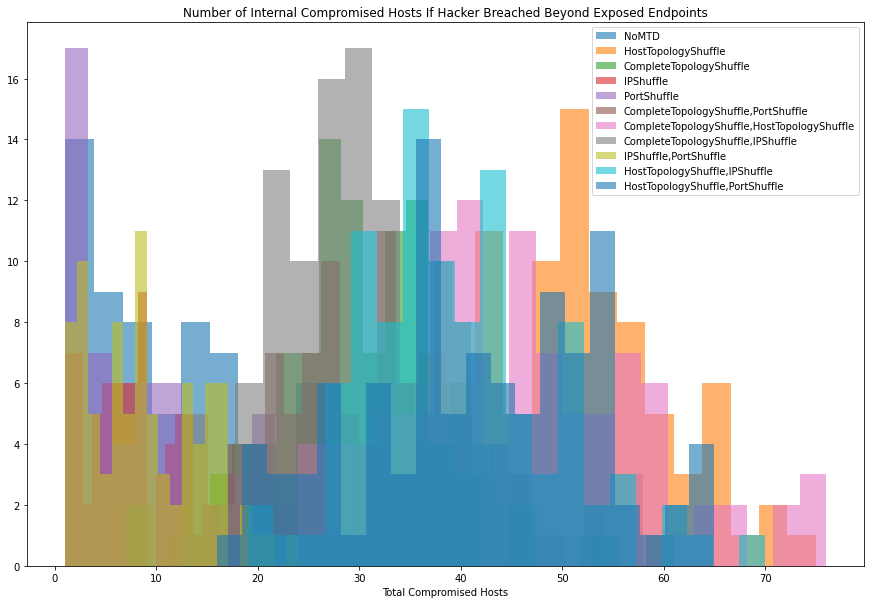

In [11]:
compare_ip_port_topology = [
    "NoMTD",
    'HostTopologyShuffle',
    'CompleteTopologyShuffle',
    'IPShuffle',
    'PortShuffle',
    'CompleteTopologyShuffle,PortShuffle',
    'CompleteTopologyShuffle,HostTopologyShuffle',
    'CompleteTopologyShuffle,IPShuffle',
    'IPShuffle,PortShuffle',
    'HostTopologyShuffle,IPShuffle',
    'HostTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

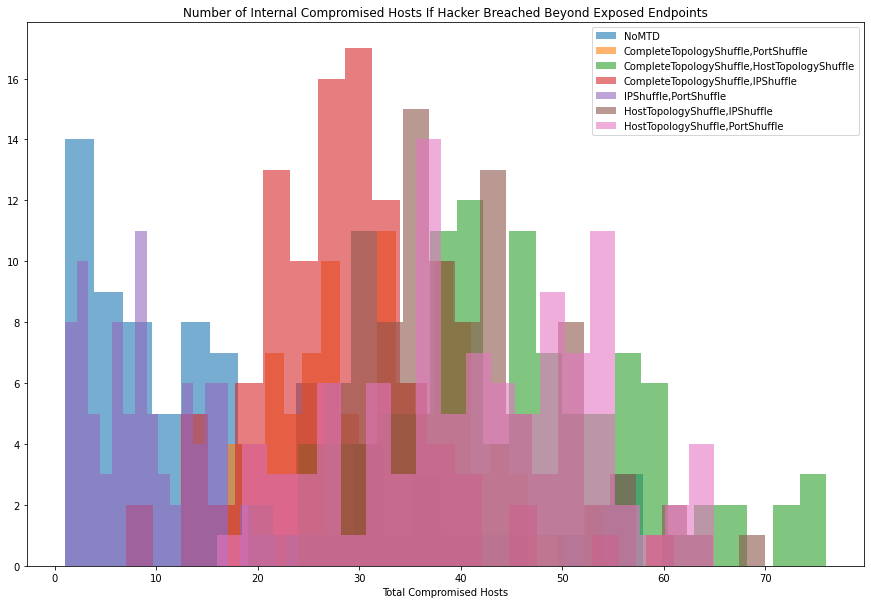

In [12]:
compare_ip_port_topology = [
    "NoMTD",
    'CompleteTopologyShuffle,PortShuffle',
    'CompleteTopologyShuffle,HostTopologyShuffle',
    'CompleteTopologyShuffle,IPShuffle',
    'IPShuffle,PortShuffle',
    'HostTopologyShuffle,IPShuffle',
    'HostTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

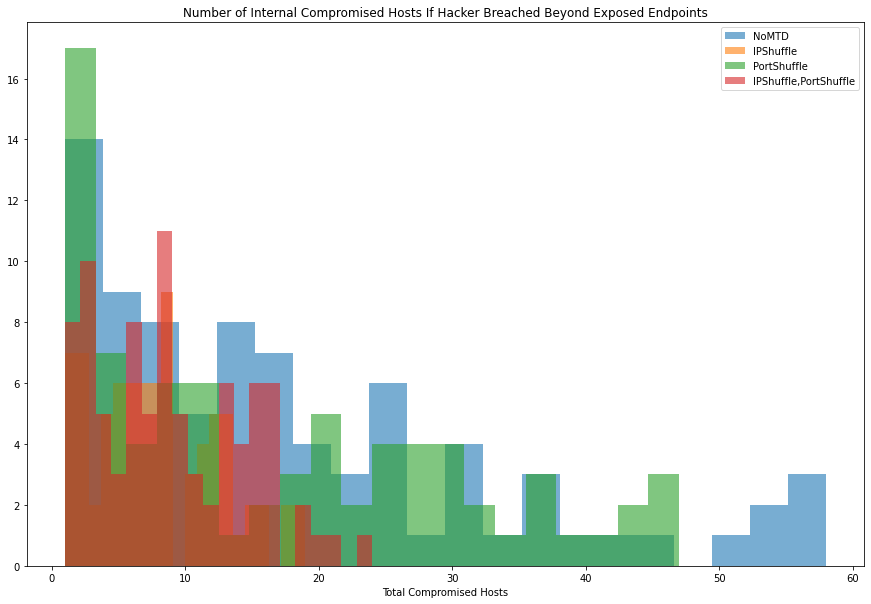

In [13]:
compare_ip_port_topology = [
    "NoMTD",
    'IPShuffle',
    'PortShuffle',
    'IPShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

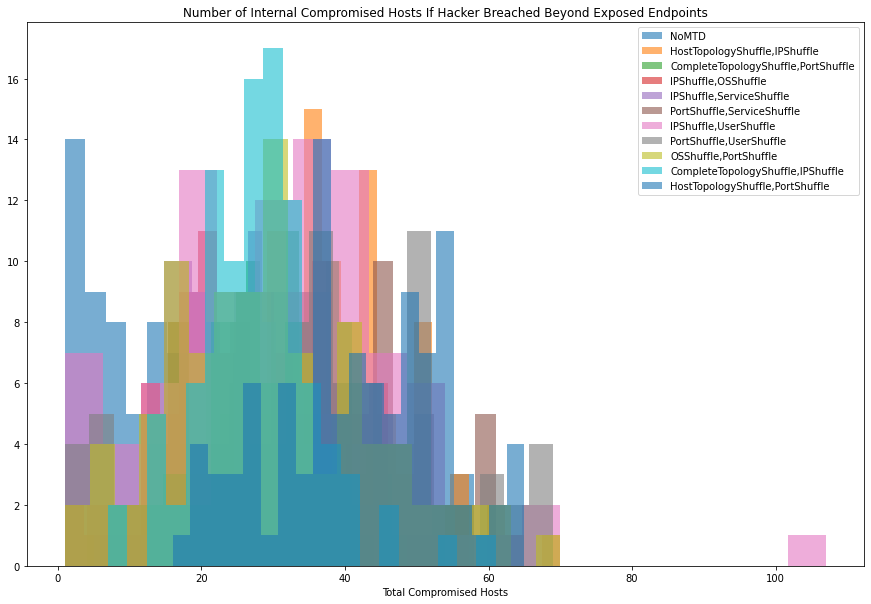

In [14]:
compare_ip_port_topology = ["NoMTD"] + [
    x
        for x in simulation2_types
            if ("PortShuffle" in x or "IPShuffle" in x) and not ("PortShuffle" in x and "IPShuffle" in x) and len(x.split(',')) != 1
]

compromised_histogram(compare_ip_port_topology, combination2_results)

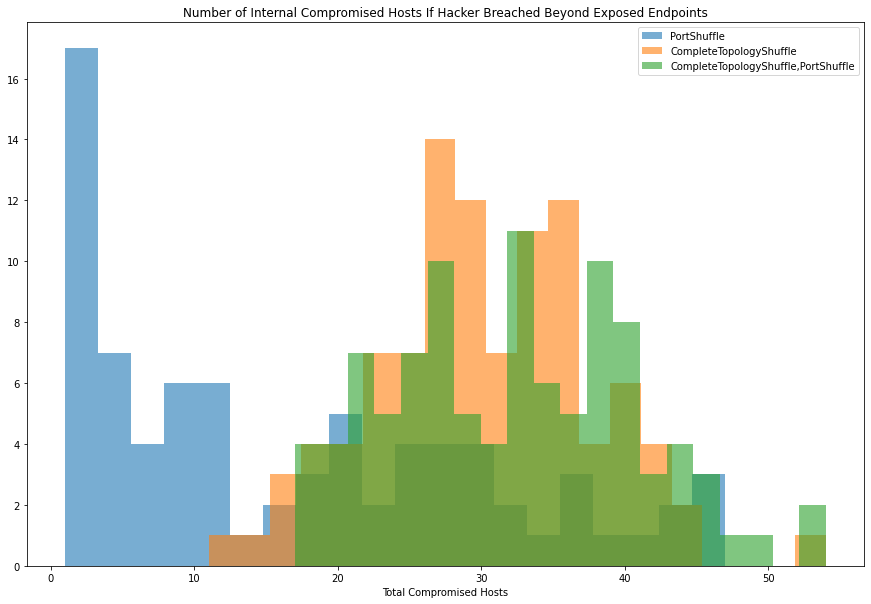

In [15]:
compare_ip_port_topology = [
    'PortShuffle',
    'CompleteTopologyShuffle',
    'CompleteTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

In [16]:
def compare_mtd_proportions(df, mtd_strat, compare_ratio_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    
    df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
    df_mtd_host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
    
    x_ratio_blocked = []
    y_hosts_compromised = []
    mtd_types_seen = []
    
    for index, mtd_strats_events in enumerate(df_mtd_events):
        total_blocked_events = 0
        total_compare_mtd_events = 0
        
        for mtd_strat_results in mtd_strats_events:
            mtd_type = mtd_strat_results["record name"]
            if not mtd_type in mtd_types_seen:
                mtd_types_seen.append(mtd_type)
                
            if mtd_type == compare_ratio_strat:
                total_compare_mtd_events += mtd_strat_results["total blocks"]
                
            total_blocked_events += mtd_strat_results["total blocks"]
            
        try:
            x_ratio_blocked.append(total_compare_mtd_events / total_blocked_events)
            y_hosts_compromised.append(df_mtd_host_compromises[index])
        except:
            pass
        
    fig, ax = plt.subplots(figsize=(15,10))
    legend_list = [mtd_strat]
    ax.set_title("Ratio of Type of MTD Blocking Hacker Event and Internal Hosts Compromised")
    ax.set_xlabel("Ratio of Strategy {} Blocking Hacker".format(compare_ratio_strat))
    ax.set_ylabel("Hosts Compromised")
    ax.scatter(x_ratio_blocked, y_hosts_compromised)
    
    for mtd_type in mtd_types_seen:

        hosts_compromised = parse_json_column_to_dataframe(df.loc[df["Simulation Type"] == mtd_type], "Host Compromises")["total not exposed events"].to_list()
        if mtd_type == compare_ratio_strat:
            x = [1]*len(hosts_compromised)
        else:
            x = [0]*len(hosts_compromised)
            
        legend_list.append(mtd_type)
        ax.scatter(x, hosts_compromised, alpha=0.5)

    ax.legend(legend_list)
        
    

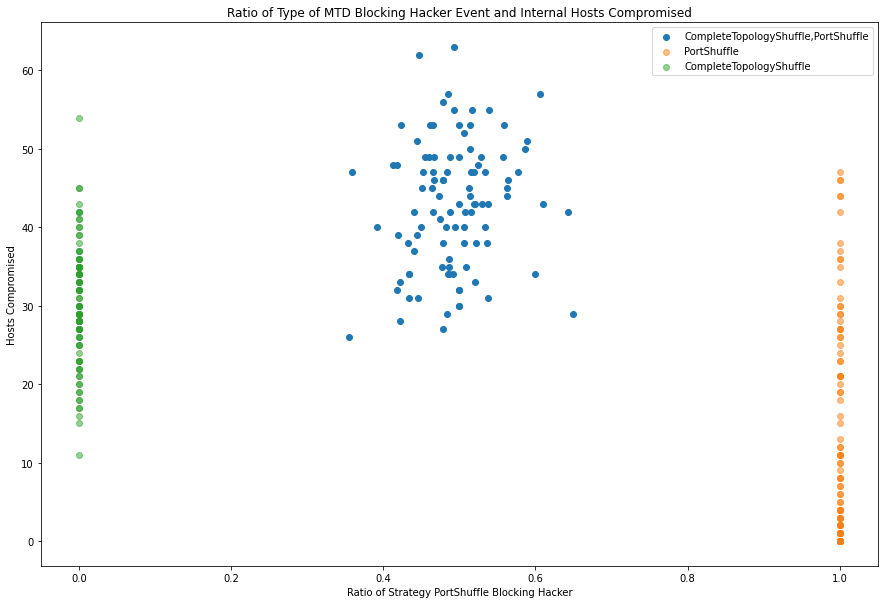

In [17]:
compare_mtd_proportions(combination2_results, "CompleteTopologyShuffle,PortShuffle", "PortShuffle")

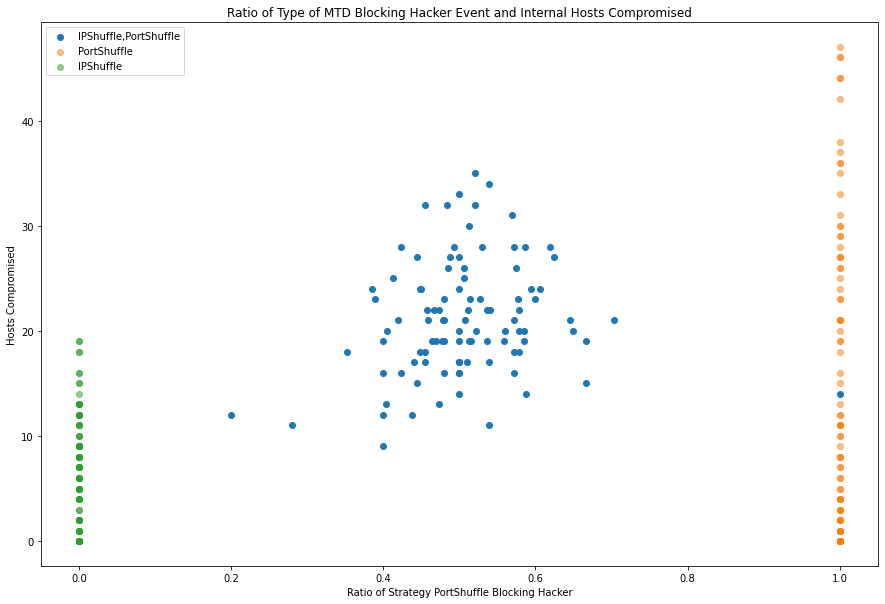

In [18]:
compare_mtd_proportions(combination2_results, "IPShuffle,PortShuffle", "PortShuffle")

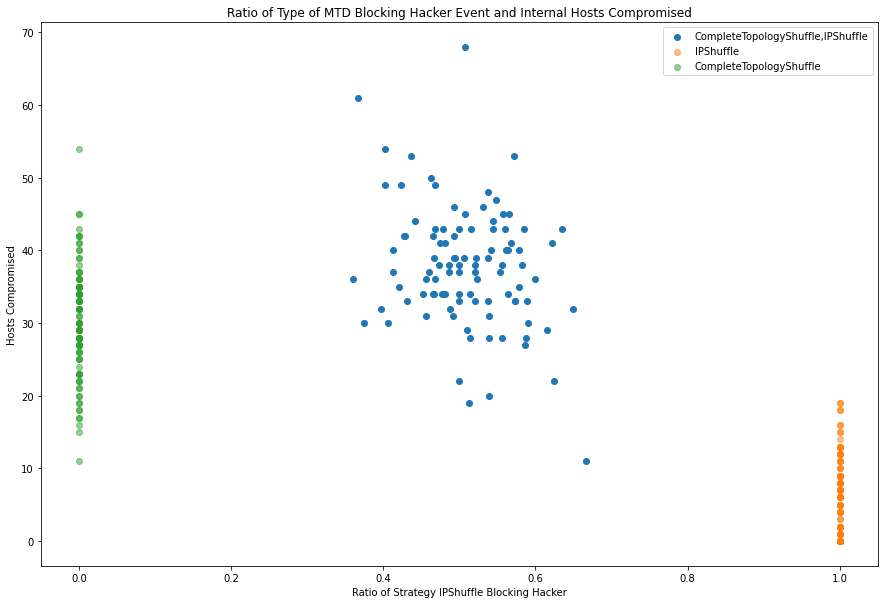

In [19]:
compare_mtd_proportions(combination2_results, 'CompleteTopologyShuffle,IPShuffle', 'IPShuffle')

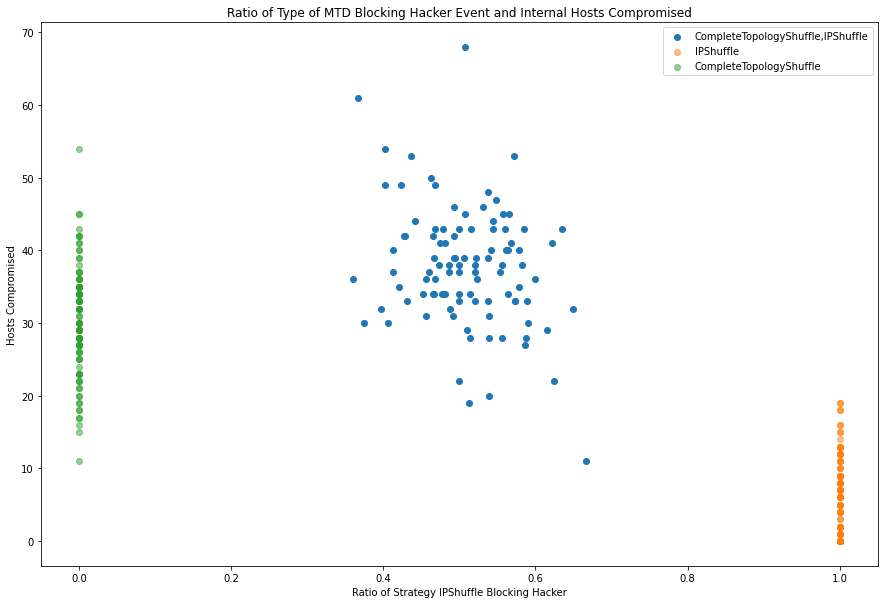

In [20]:
compare_mtd_proportions(combination2_results, 'CompleteTopologyShuffle,IPShuffle', 'IPShuffle')

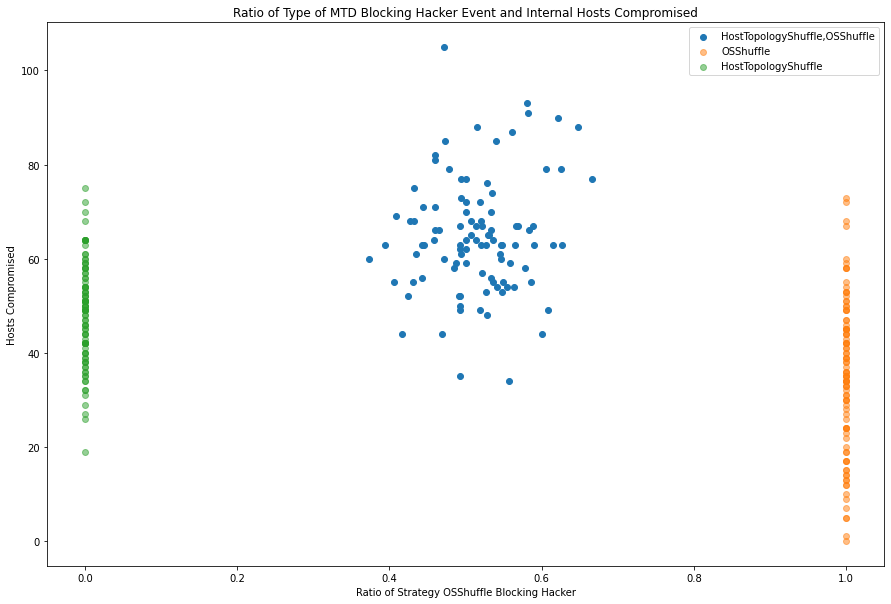

In [21]:
compare_mtd_proportions(combination2_results, 'HostTopologyShuffle,OSShuffle', 'OSShuffle')

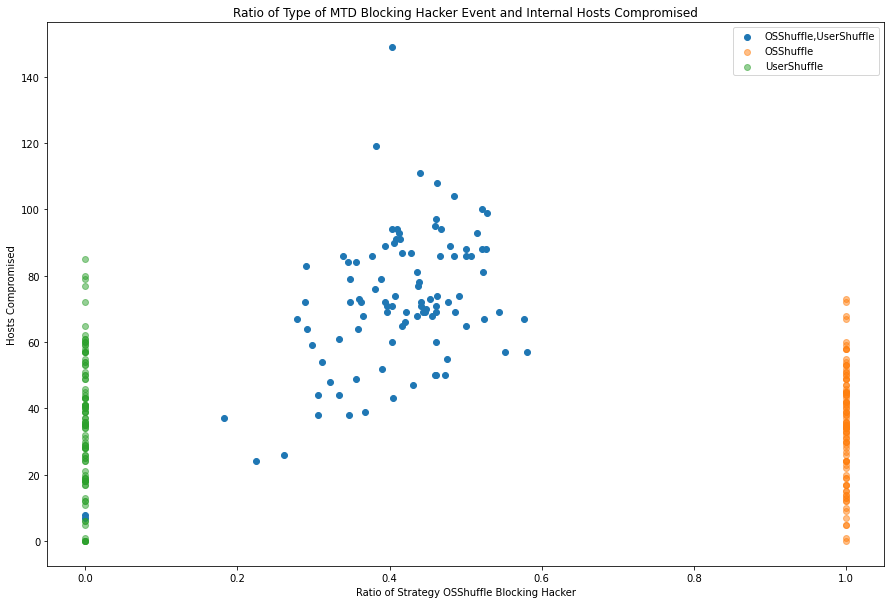

In [22]:
compare_mtd_proportions(combination2_results, 'OSShuffle,UserShuffle', 'OSShuffle')

In [23]:
def compare_hosts_compromised_with_blocked_mtd(df, mtd_strats):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Internal Hosts Compromised in Comparison to Time MTD Blocked")
    ax.set_xlabel("Times MTD Stragies Blocked Hacker")
    ax.set_ylabel("Hosts Compromised")
    
    legend_list = []
    for mtd_strat in mtd_strats:
        legend_list.append(mtd_strat)
        df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
        
        df_mtd_events = df_mtd["Total MTD Blocking Hacker Events"].to_numpy()
        mtd_host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
        
        ax.scatter(df_mtd_events, mtd_host_compromises)
        
    ax.legend(legend_list)

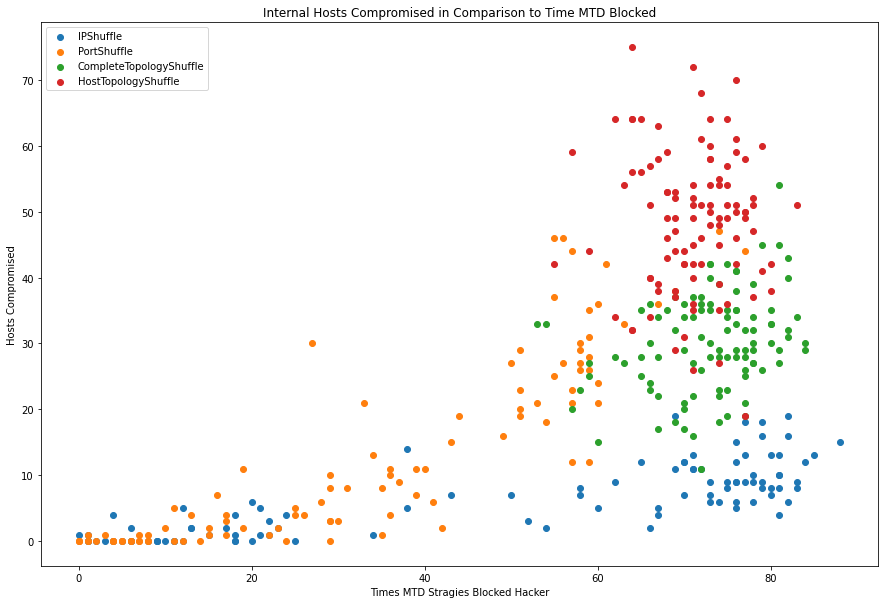

In [24]:
test_strats = [
    "IPShuffle",
    "PortShuffle",
    "CompleteTopologyShuffle",
    "HostTopologyShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

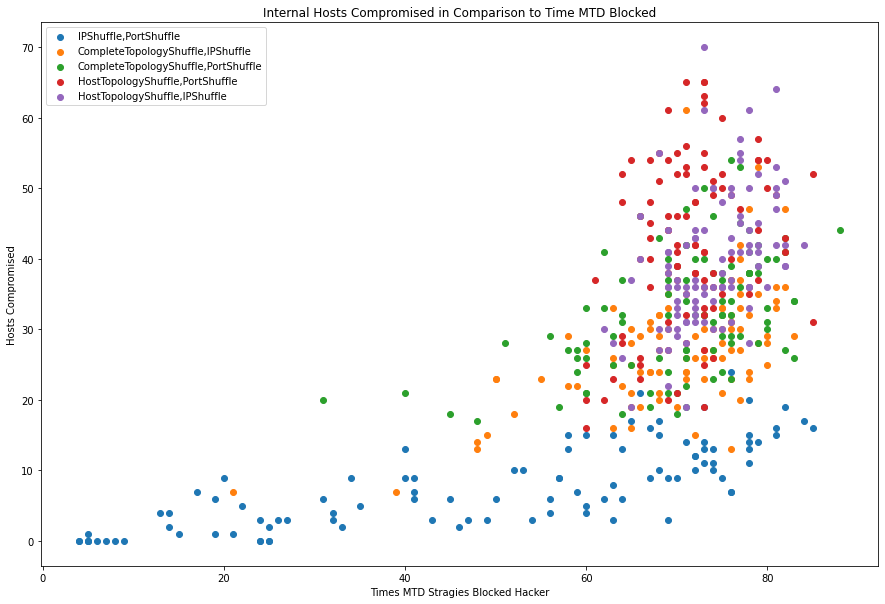

In [25]:
test_strats = [
    "IPShuffle,PortShuffle",
    "CompleteTopologyShuffle,IPShuffle",
    "CompleteTopologyShuffle,PortShuffle",
    "HostTopologyShuffle,PortShuffle",
    "HostTopologyShuffle,IPShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

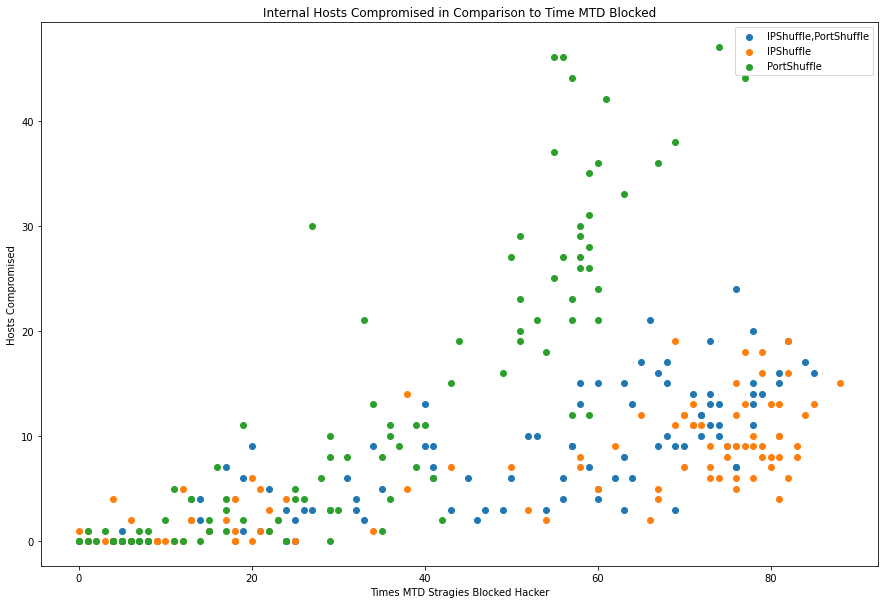

In [26]:
test_strats = [
    "IPShuffle,PortShuffle",
    "IPShuffle",
    "PortShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

In [27]:
def get_medians(df):
    mtd_types = df["Simulation Type"].unique()
    
    averages = []
    for mtd_type in mtd_types:
        df_mtd = df.loc[df["Simulation Type"] == mtd_type]
        blocked_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
        avg_mtd_host_compromises = np.median(blocked_events)
#         q1 = np.percantile(blocked_events, 25)
#         q3 = np.percentile(blocked_events, 75)
        averages.append((mtd_type, avg_mtd_host_compromises))
        
    averages = np.array(sorted(averages, key = lambda x: x[1]))
    return np.array(averages[:,0], dtype=str), np.array(averages[:,1], dtype=np.float64)

In [28]:
avg_host_compromises = get_medians(combination2_results)

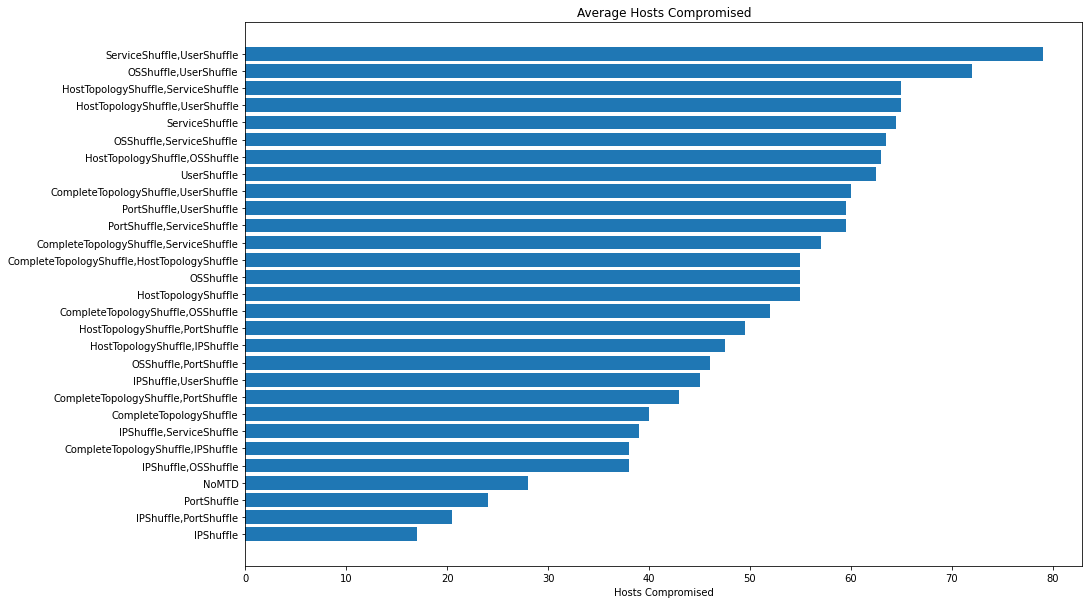

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

ax.barh(avg_host_compromises[0], avg_host_compromises[1])
ax.set_title("Average Hosts Compromised")
ax.set_xlabel("Hosts Compromised")

plt.show()

In [30]:
def expand_time_series(x, y, total_time=250000):
    new_x = []
    new_y = []
    
    next_x_i = 0
    next_x = x[0]
    prev_y = 0
    
    for i in range(total_time):
        if i == next_x:
            prev_y = y[next_x_i]
            next_x_i += 1
            if next_x_i >= len(x):
                next_x_i = len(x) - 1
            next_x = x[next_x_i]
            
        new_x.append(i)
        new_y.append(prev_y)
        
    return new_x, new_y

def get_host_compromised_time_series(df, mtd_strat, numpy_fn=np.mean):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    
    all_old_x = []
    all_old_y = []
    
    all_x = []
    all_compromised_hosts = []
    
    for index, hosts_compromised_row in parse_json_column_to_dataframe(df_mtd, "Host Compromises").iterrows():
        x = [0] + hosts_compromised_row['not exposed x']
        y = [0] + hosts_compromised_row['cumulative not exposed y']
        all_old_x.append(x)
        all_old_y.append(y)
        all_x, new_y = expand_time_series(x,y)
        all_compromised_hosts.append(new_y)

    avg_time = numpy_fn(np.array(all_compromised_hosts), axis=0)
    return all_old_x, all_old_y, all_x, avg_time

In [31]:
def plot_compromised_times(df, mtd_strat):
    all_old_x, all_old_y, all_x, avg_time = get_host_compromised_time_series(df, mtd_strat)
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Average Time To Compromise Internal Hosts MTD: {}".format(mtd_strat))
    ax.set_ylabel("Hosts Compromised")
    ax.set_xlabel("Time")
    
    for i, x in enumerate(all_old_x):
        y = all_old_y[i]
        
        ax.plot(x,y, alpha=0.3)

    ax.plot(all_x, avg_time)

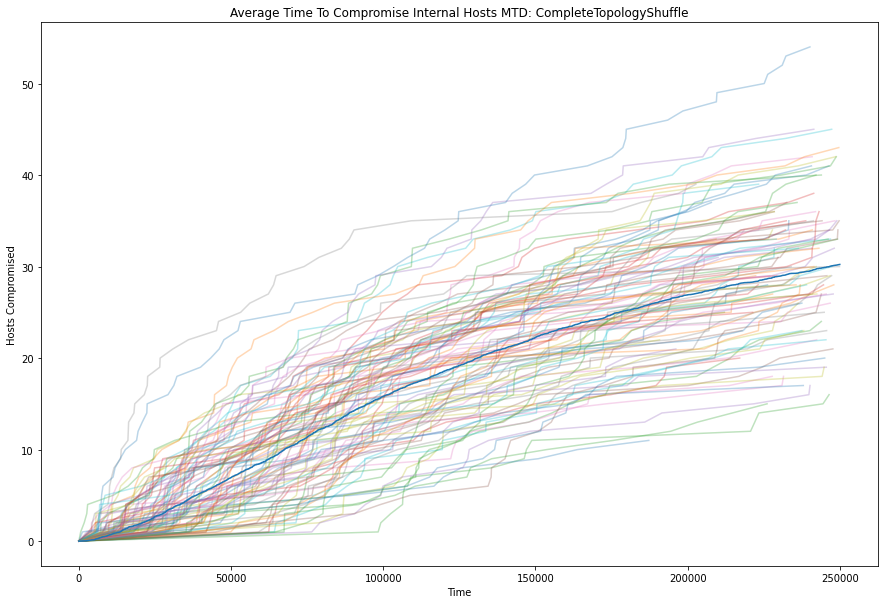

In [32]:
plot_compromised_times(combination2_results, "CompleteTopologyShuffle")

In [63]:
def plot_all_avg_time_series(df, mtd_filter=None):
    mtd_types = df["Simulation Type"].unique()
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Average Internal Hosts Compromised In Comparison To Simulation Time")
    ax.set_ylabel("Hosts Compromised")
    ax.set_xlabel("Time")
    
    legend_list = []
    
    if not mtd_filter == None:
        mtd_types = mtd_filter
    
    for mtd_type in mtd_types:
        _x, _y, all_x, avg_time = get_host_compromised_time_series(df, mtd_type)
        ax.plot(all_x, avg_time)
        legend_list.append(mtd_type)
        
    ax.legend(legend_list)

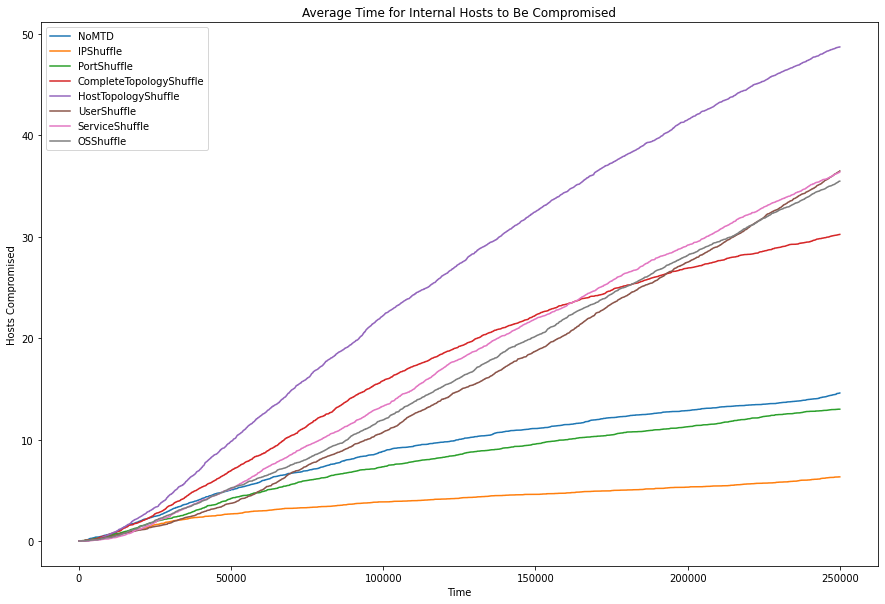

In [34]:
plot_all_avg_time_series(combination2_results, mtd_filter=[
    "NoMTD",
    "IPShuffle",
    "PortShuffle",
    "CompleteTopologyShuffle",
    "HostTopologyShuffle",
    "UserShuffle",
    "ServiceShuffle",
    "OSShuffle"
])

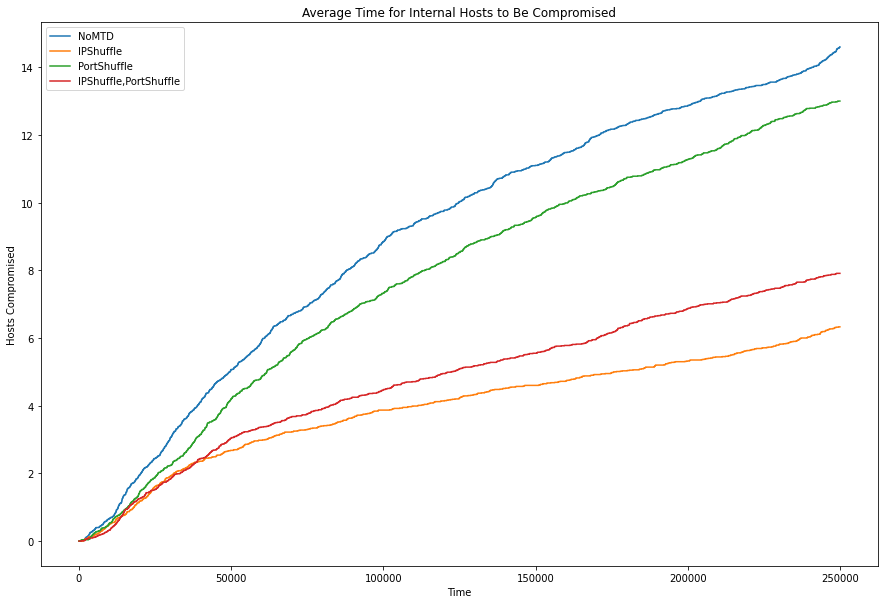

In [35]:
plot_all_avg_time_series(combination2_results, mtd_filter=[
    "NoMTD",
    "IPShuffle",
    "PortShuffle",
    "IPShuffle,PortShuffle"
])

In [34]:
GOOD_MTD = [
    "PortShuffle",
    "IPShuffle"
]

BAD_MTD = [
    "CompleteTopologyShuffle",
    "HostTopologyShuffle",
    "UserShuffle",
    "ServiceShuffle",
    "OSShuffle"
]

# TODO

* Find the confidence intervals for the mean time it takes to compromise the internal hosts if a bad strategy is paired with a good one.
* Compare these means and intervals with the distrubtions of just the good strategies.
* Compare with the combination of 3 MTD strategies

In [33]:
def confidence_interval_for_compromised_internal_hosts(df, mtd_strat, confidence):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    not_exposed_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
    return st.t.interval(confidence, len(not_exposed_events)-1, loc=np.mean(not_exposed_events), scale=st.sem(not_exposed_events))
    
    
def mean_for_compromised_internal_hosts(df, mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    not_exposed_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
    return np.mean(not_exposed_events)

def standard_deviation_for_mean_compromised_internal_hosts(df, mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    not_exposed_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
    return np.divide(np.std(not_exposed_events), np.sqrt(len(not_exposed_events)))

In [34]:
confidence_interval_for_compromised_internal_hosts(combination2_results, "HostTopologyShuffle,IPShuffle", 0.99)

(37.14133184902294, 42.098668150977055)

In [35]:
def compare_confidence_intervals(df, filter_mtd=["PortShuffle", "IPShuffle"], confidence=0.99):
    mtd_types = df["Simulation Type"].unique()
    
    if len(filter_mtd) > 0:
        dataframes = []
        
        for mtd_type in mtd_types:
            for f_mtd in filter_mtd:
                if f_mtd in mtd_type:
                    dataframes.append(df.loc[df["Simulation Type"] == mtd_type])
                elif len(mtd_type.split(',')) == 1:
                    dataframes.append(df.loc[df["Simulation Type"] == mtd_type])
        df = pd.concat(dataframes)
        
    mtd_types = df["Simulation Type"].unique()
    mtd_confs = []
    
    for mtd_type in mtd_types:
        conf_interval = confidence_interval_for_compromised_internal_hosts(df, mtd_type, confidence)
        mean_hosts = mean_for_compromised_internal_hosts(df, mtd_type)
        mtd_confs.append((mtd_type, conf_interval[0], conf_interval[1] - conf_interval[0], mean_hosts))
        
    
    mtd_confs = sorted(mtd_confs, key = lambda x: x[3])
    mtd_confs = np.array(mtd_confs)
        
    fig, ax = plt.subplots(figsize=(15,10))

    ax.barh(mtd_confs[:,0], np.array(mtd_confs[:,2],dtype=float),left=np.array(mtd_confs[:,1], dtype=float))
    ax.set_title("{}% Confidence Interval for Mean of Internal Hosts Compromised".format(confidence*100))
    ax.set_ylabel("Type of MTD")
    ax.set_xlabel("Internal Hosts Compromised")
    

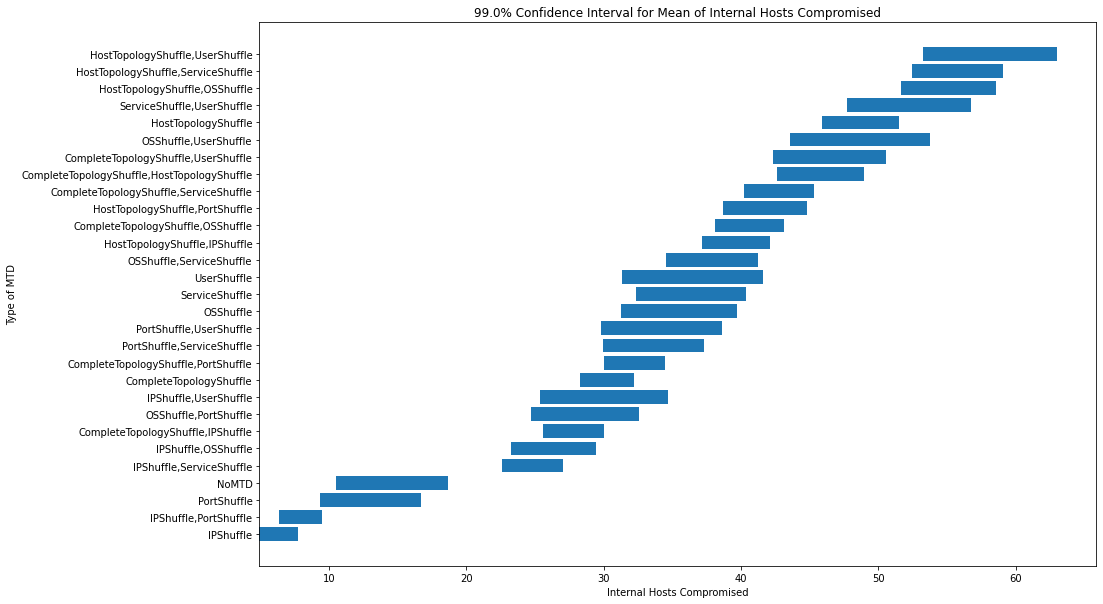

In [36]:
compare_confidence_intervals(combination2_results, filter_mtd=[])

In [37]:
standard_deviation_for_mean_compromised_internal_hosts(combination2_results, "IPShuffle,UserShuffle")

1.7622133809502185


# Z-Test

http://homework.uoregon.edu/pub/class/es202/ztest.html

In [38]:
def z_test_mean_internal_compromised(df, mtd_strat1, mtd_strat2):
    
    mean_1 = mean_for_compromised_internal_hosts(df, mtd_strat1)
    mean_2 = mean_for_compromised_internal_hosts(df, mtd_strat2)
    
    std_1 = standard_deviation_for_mean_compromised_internal_hosts(df, mtd_strat1)
    std_2 = standard_deviation_for_mean_compromised_internal_hosts(df, mtd_strat2)
    
    return np.divide(np.subtract(mean_1, mean_2), np.sqrt(np.power(std_1, 2) + np.power(std_2, 2)))

In [39]:
z_test_mean_internal_compromised(combination2_results, "IPShuffle", "IPShuffle,PortShuffle")

-1.9962770450943719

In [40]:
import string

def matches_distribution_z_statistc(z_value):
    z_abs = np.absolute(z_value)
    
    if z_abs <= 2:
        return "Nearly Identical"
    elif z_abs > 2 and z_abs <= 2.5:
        return "Marginally Different"
    elif z_abs > 2.5 and z_abs <= 3:
        return "Significantly Different"
    return "Highly Significantly Different"

def get_z_test_table(df, combine_size=2):
    mtd_labels = ["m_1", "m_2", "m_3"]
    
    mtd_types = df["Simulation Type"].unique()
    
    combine_mtd_types = [
        x
            for x in mtd_types
                if len(x.split(",")) == combine_size
    ]
    
    z_table_dict = []
    
    def sort_fn(x):
        if x == "IPShuffle":
            return "A"
        elif x == "PortShuffle":
            return "B"
        return x
    
    for mtd_type in combine_mtd_types:
        if "UserShuffle" in mtd_type:
            continue
        used_mtds = sorted(mtd_type.split(","), key=sort_fn)
        
        most_likely_mtd = ""
        most_likely_mtd_z_statistic = 1 << 10
        
        mtd_dict = {
            "\\textbf{MTD ($M = \{"+ ", ".join([mtd_labels[i] for i in range(combine_size)]) +"\}$)}" : mtd_type
        }
        
        for index, used_mtd in enumerate(used_mtds):
            z_value = z_test_mean_internal_compromised(df, mtd_type, used_mtd)
        
            label = mtd_labels[index]
            if np.absolute(z_value) < most_likely_mtd_z_statistic:
                most_likely_mtd_z_statistic = np.absolute(z_value)
                most_likely_mtd = used_mtd
            mtd_dict = {
                **mtd_dict,
                "${}$".format(label) : "\\textit{" + used_mtd + "}",
                "$Z_{{ {} }}$".format(label) : z_value,
                "\\textbf{Reject $H_{ 0,"+ label +" }$}" : z_value < 2.576 and z_value > -2.576
            }
        
        mtd_dict["Closest Matching MTD"] = "\\textbf{\\textit{" + most_likely_mtd + "}}"
        z_table_dict.append(mtd_dict)
            
    return pd.DataFrame(z_table_dict)

In [41]:
z_combine2_table = get_z_test_table(combination2_results)
z_combine2_table = z_combine2_table.round(decimals=2)
z_combine2_table

,"\textbf{MTD ($M = \{m_1, m_2\}$)}",$m_1$,$Z_{ m_1 }$,"\textbf{Reject $H_{ 0,m_1 }$}",$m_2$,$Z_{ m_2 }$,"\textbf{Reject $H_{ 0,m_2 }$}",Closest Matching MTD
0,"OSShuffle,ServiceShuffle",\textit{OSShuffle},1.19,True,\textit{ServiceShuffle},0.77,True,\textbf{\textit{ServiceShuffle}}
1,"IPShuffle,PortShuffle",\textit{IPShuffle},2.00,True,\textit{PortShuffle},-3.37,False,\textbf{\textit{IPShuffle}}
2,"HostTopologyShuffle,IPShuffle",\textit{IPShuffle},30.92,False,\textit{HostTopologyShuffle},-6.41,False,\textbf{\textit{HostTopologyShuffle}}
3,"CompleteTopologyShuffle,PortShuffle",\textit{PortShuffle},11.83,False,\textit{CompleteTopologyShuffle},1.81,True,\textbf{\textit{CompleteTopologyShuffle}}
4,"CompleteTopologyShuffle,HostTopologyShuffle",\textit{CompleteTopologyShuffle},10.99,False,\textit{HostTopologyShuffle},-1.83,True,\textbf{\textit{HostTopologyShuffle}}
5,"IPShuffle,OSShuffle",\textit{IPShuffle},15.69,False,\textit{OSShuffle},-4.61,False,\textbf{\textit{OSShuffle}}
6,"IPShuffle,ServiceShuffle",\textit{IPShuffle},18.58,False,\textit{ServiceShuffle},-6.69,False,\textbf{\textit{ServiceShuffle}}
7,"PortShuffle,ServiceShuffle",\textit{PortShuffle},10.51,False,\textit{ServiceShuffle},-1.35,True,\textbf{\textit{ServiceShuffle}}
8,"OSShuffle,PortShuffle",\textit{PortShuffle},7.66,False,\textit{OSShuffle},-3.13,False,\textbf{\textit{OSShuffle}}
9,"CompleteTopologyShuffle,IPShuffle",\textit{IPShuffle},21.59,False,\textit{CompleteTopologyShuffle},-2.14,True,\textbf{\textit{CompleteTopologyShuffle}}


In [89]:
#z_combine2_table.to_csv("results/2-combinations-comparison-statistic.csv", index = False)

In [44]:
z_combine2_ip_port_table = z_combine2_table.loc[(z_combine2_table["MTD Strategy A"] == "IPShuffle") | (z_combine2_table["MTD Strategy A"] == "PortShuffle")]

z_combine2_ip_port_table.to_csv("results/2-combinations-z-statistics-ip-port.csv", index = False)

In [45]:
z_combine2_table.loc[(z_combine2_table["MTD Strategy A"] == "IPShuffle") | (z_combine2_table["MTD Strategy A"] == "PortShuffle")]

,Combined MTD Strategy,MTD Strategy A,Z Statistic A,Matches Combined Mean Distribution A,MTD Strategy B,Z Statistic B,Matches Combined Mean Distribution B
1,"IPShuffle,PortShuffle",IPShuffle,-1.996277,Nearly Identical,PortShuffle,3.365170,Highly Significantly Different
2,"HostTopologyShuffle,IPShuffle",IPShuffle,-30.917426,Highly Significantly Different,HostTopologyShuffle,6.413163,Highly Significantly Different
3,"CompleteTopologyShuffle,PortShuffle",PortShuffle,-11.827271,Highly Significantly Different,CompleteTopologyShuffle,-1.806554,Nearly Identical
7,"IPShuffle,OSShuffle",IPShuffle,-15.689125,Highly Significantly Different,OSShuffle,4.610187,Highly Significantly Different
8,"IPShuffle,ServiceShuffle",IPShuffle,-18.575444,Highly Significantly Different,ServiceShuffle,6.687145,Highly Significantly Different
9,"PortShuffle,ServiceShuffle",PortShuffle,-10.509203,Highly Significantly Different,ServiceShuffle,1.346564,Nearly Identical
10,"IPShuffle,UserShuffle",IPShuffle,-12.879933,Highly Significantly Different,UserShuffle,2.461691,Marginally Different
11,"PortShuffle,UserShuffle",PortShuffle,-9.747770,Highly Significantly Different,UserShuffle,0.889371,Nearly Identical
12,"OSShuffle,PortShuffle",PortShuffle,-7.659988,Highly Significantly Different,OSShuffle,3.127943,Highly Significantly Different
13,"CompleteTopologyShuffle,IPShuffle",IPShuffle,-21.590773,Highly Significantly Different,CompleteTopologyShuffle,2.136304,Marginally Different


In [42]:
combination3_results = pd.read_csv(COMBINATION3_RESULTS_CSV)

In [43]:
combination3_results

,Total Initial Vulnerabilities,Initial Vulns Per OS,Average Initial RoA Per OS,OS Types In Initial Network,Initial Hosts Without Vulnerabilities,Host Compromises,Vuln Compromises,Reuse Password Compromises,Password Spray Compromises,User Account Leaks,Vulnerabilities Exploited,MTD Statistics,Total MTD Events,Total MTD Blocking Hacker Events,Complete Time,Simulation Type
0,653,"{'windows': {'10': 14, '8': 36, '8.1': 41, 'vi...","{'windows': {'10': 0.031675031359308235, '8': ...","{'windows 10': 14, 'ubuntu 20.04': 8, 'centos ...",49,"{'record name': 'Host Compromises', 'x': [769,...","{'record name': 'Vuln Compromises', 'x': [769,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [5212, 84...",82,76,249999,"IPShuffle,PortShuffle,UserShuffle"
1,652,"{'freebsd': {'12': 19, '11': 43, '9': 45, '8':...","{'freebsd': {'12': 0.11299085309818264, '11': ...","{'freebsd 12': 10, 'centos 5': 6, 'windows 7':...",37,"{'record name': 'Host Compromises', 'x': [4790...","{'record name': 'Vuln Compromises', 'x': [4790...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [4348, 26...",83,68,249999,"IPShuffle,PortShuffle,UserShuffle"
2,708,"{'ubuntu': {'20.04': 26, '10.04': 44, '16.04':...","{'ubuntu': {'20.04': 0.12060171711208746, '10....","{'ubuntu 20.04': 16, 'windows 10': 20, 'centos...",48,"{'record name': 'Host Compromises', 'x': [421,...","{'record name': 'Vuln Compromises', 'x': [421,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [1469, 10...",87,75,249999,"CompleteTopologyShuffle,IPShuffle,PortShuffle"
3,839,"{'centos': {'5': 38, '6': 21, '3': 87, '8': 15...","{'centos': {'5': 0.052626834718287135, '6': 0....","{'centos 5': 7, 'freebsd 13': 12, 'freebsd 12'...",34,"{'record name': 'Host Compromises', 'x': [1229...","{'record name': 'Vuln Compromises', 'x': [1229...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [12747, 2...",86,70,249999,"IPShuffle,PortShuffle,UserShuffle"
4,674,"{'windows': {'vista': 21, '10': 9, '7': 22, '8...","{'windows': {'vista': 0.05208087374154996, '10...","{'windows vista': 5, 'centos 4': 2, 'windows 1...",57,"{'record name': 'Host Compromises', 'x': [4803...","{'record name': 'Vuln Compromises', 'x': [4803...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [32283, 5...",82,57,249999,"IPShuffle,PortShuffle,ServiceShuffle"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,729,"{'freebsd': {'11': 32, '10': 50, '13': 11, '12...","{'freebsd': {'11': 0.10970493015524983, '10': ...","{'windows 10': 18, 'freebsd 11': 9, 'centos 8'...",38,"{'record name': 'Host Compromises', 'x': [1812...","{'record name': 'Vuln Compromises', 'x': [1812...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [4841, 15...",86,76,249999,"HostTopologyShuffle,IPShuffle,PortShuffle"
496,735,"{'windows': {'8': 28, '8.1': 27, 'vista': 6, '...","{'windows': {'8':

In [45]:
combined_df = pd.concat([combination2_results, combination3_results])

In [53]:
z_combined_table = get_z_test_table(combined_df, combine_size = 3)
z_combined_table = z_combined_table.round(decimals=2)

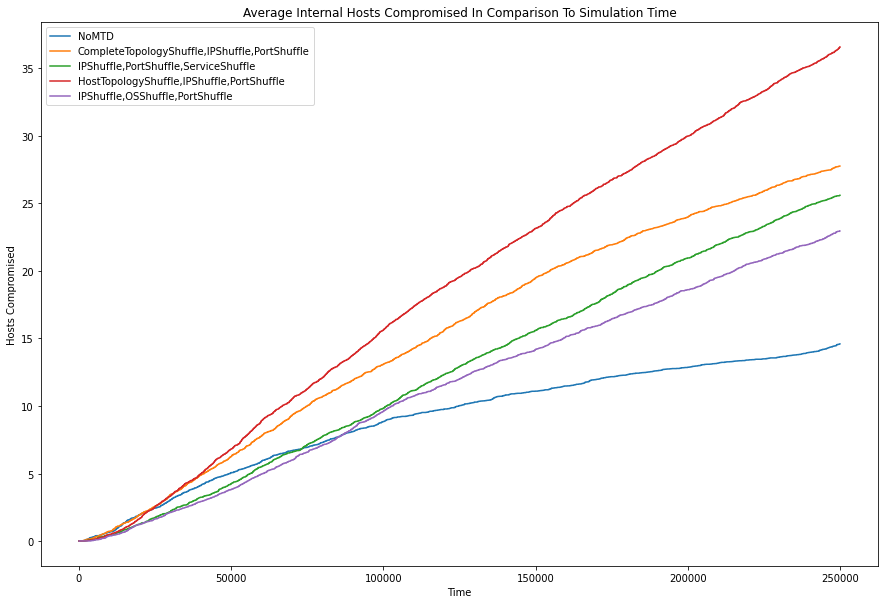

In [64]:
plot_all_avg_time_series(combined_df, mtd_filter=[
    "NoMTD",
    "CompleteTopologyShuffle,IPShuffle,PortShuffle",
    "IPShuffle,PortShuffle,ServiceShuffle",
    "HostTopologyShuffle,IPShuffle,PortShuffle",
    "IPShuffle,OSShuffle,PortShuffle"
])

In [54]:
# z_combined_table.to_csv("results/3-combinations-ip-and-port-z-statistics.csv", index = False)

In [55]:
z_combined_table

,"\textbf{MTD ($M = \{m_1, m_2, m_3\}$)}",$m_1$,$Z_{ m_1 }$,"\textbf{Reject $H_{ 0,m_1 }$}",$m_2$,$Z_{ m_2 }$,"\textbf{Reject $H_{ 0,m_2 }$}",$m_3$,$Z_{ m_3 }$,"\textbf{Reject $H_{ 0,m_3 }$}",Closest Matching MTD
0,"CompleteTopologyShuffle,IPShuffle,PortShuffle",\textit{IPShuffle},21.37,False,\textit{PortShuffle},9.04,False,\textit{CompleteTopologyShuffle},-2.18,True,\textbf{\textit{CompleteTopologyShuffle}}
1,"IPShuffle,PortShuffle,ServiceShuffle",\textit{IPShuffle},19.49,False,\textit{PortShuffle},7.76,False,\textit{ServiceShuffle},-6.24,False,\textbf{\textit{ServiceShuffle}}
2,"HostTopologyShuffle,IPShuffle,PortShuffle",\textit{IPShuffle},24.55,False,\textit{PortShuffle},13.22,False,\textit{HostTopologyShuffle},-7.88,False,\textbf{\textit{HostTopologyShuffle}}
3,"IPShuffle,OSShuffle,PortShuffle",\textit{IPShuffle},11.58,False,\textit{PortShuffle},5.16,False,\textit{OSShuffle},-6.00,False,\textbf{\textit{PortShuffle}}


In [57]:
# z_combined_table.to_csv("results/3-combinations-test-statistics.csv", index = False)

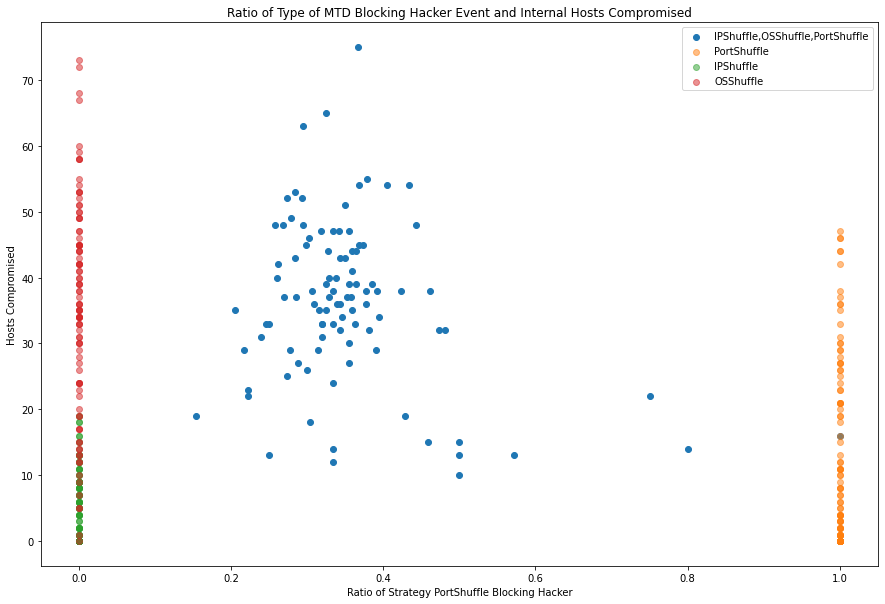

In [56]:
compare_mtd_proportions(combined_df, 'IPShuffle,OSShuffle,PortShuffle', 'PortShuffle')

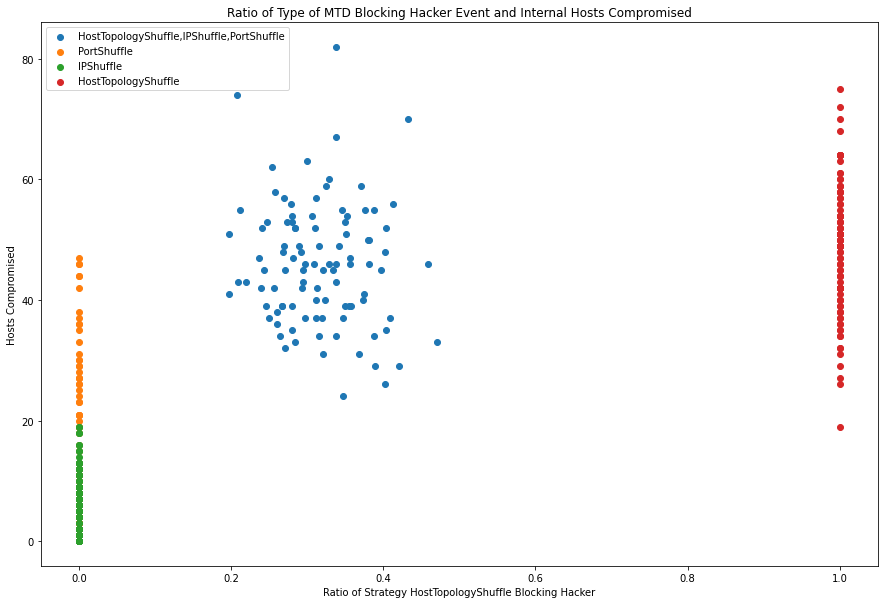

In [59]:
compare_mtd_proportions(combined_df, 'HostTopologyShuffle,IPShuffle,PortShuffle', 'HostTopologyShuffle')

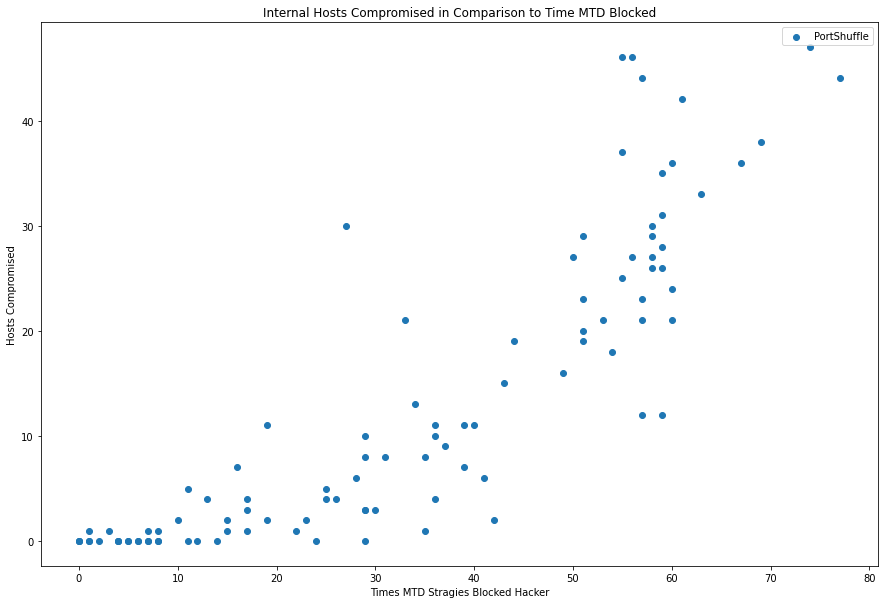

In [53]:
test_strats = [
    "PortShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

In [63]:
def mtd_relationship(df, mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    
    df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
    df_mtd_host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
    
    x_ratio = []
    y_hosts_compromised = []
    mtd_types_seen = []
    
    for index, mtd_strats_events in enumerate(df_mtd_events):
        total_events = 0
        total_compare_mtd_events = 0
        
        for mtd_strat_results in mtd_strats_events:
            mtd_type = mtd_strat_results["record name"]
            if not mtd_type in mtd_types_seen:
                mtd_types_seen.append(mtd_type)
                
            total_events += mtd_strat_results["total events"]
            
        try:
            x_ratio.append(total_events)
            y_hosts_compromised.append(df_mtd_host_compromises[index])
        except:
            pass
        
    fig, ax = plt.subplots(figsize=(15,10))
    legend_list = [mtd_strat]
    ax.set_title("Ratio of Type of MTD Blocking Hacker Event and Internal Hosts Compromised")
    ax.set_xlabel("Ratio of Strategy {} Blocking Hacker".format("Yeet"))
    ax.set_ylabel("Hosts Compromised")
    ax.scatter(x_ratio, y_hosts_compromised)

    ax.legend(legend_list)

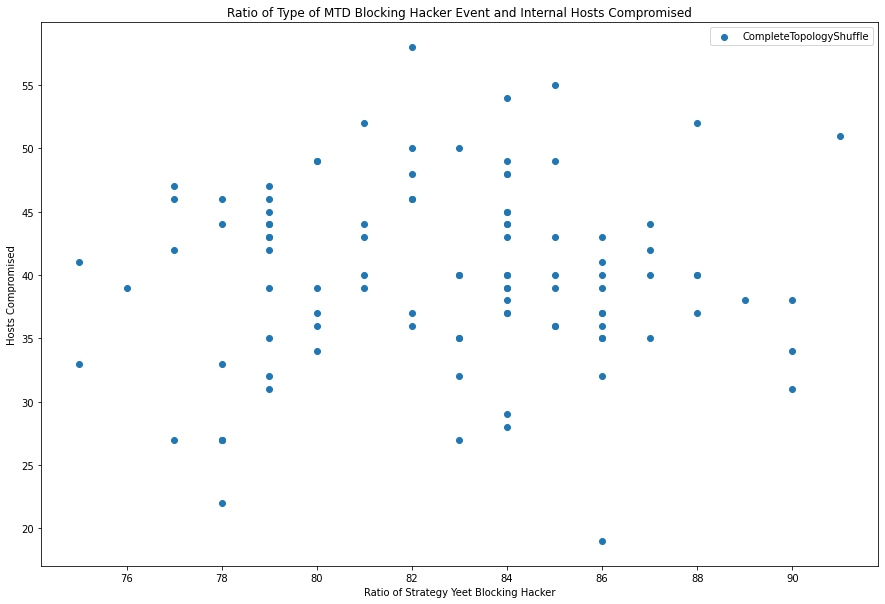

In [66]:
mtd_relationship(combination2_results, "CompleteTopologyShuffle")

In [109]:
all_old_x, all_old_y, all_x, avg_time = get_host_compromised_time_series(combination2_results, "ServiceShuffle")

In [110]:
all_time_values = np.array(all_x)

In [111]:
avg_no_mtd = np.stack((all_time_values, avg_time), axis=0)

In [112]:
avg_no_mtd

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.49997e+05,
        2.49998e+05, 2.49999e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.63900e+01,
        3.63900e+01, 3.63900e+01]])

In [113]:
np.save("results/avg_serviceshuffle.npy", avg_no_mtd)